In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import birdsonganalysis as bsa
from os.path import join, exists
from scipy.io import wavfile
import pickle
from pprint import pprint


import sys

sys.path.append('../model/hillclimbing/')

from song_fitter import SongModel, get_scores

sns.set_palette('colorblind')

In [26]:
path = '../model/hillclimbing/res/170308_185759_no_dtw/'
if exists(join(path, 'aborted.txt')):
    raise ValueError('Aborted run')

In [27]:
sr, tutor = wavfile.read(join(path, 'tutor.wav'))
with open(join(path, 'params.pkl'), 'rb') as f:
    run_param = pickle.load(f)

In [28]:
pprint(run_param)

{'concurrent': 3,
 'days': 3,
 'iter_per_train': 20,
 'name': 'no_dtw',
 'replay': 5,
 'seed': 1488995879,
 'sr': 44100,
 'train_per_day': 10,
 'tutor': array([-10,   2,  15, ...,   3,  -8, -15], dtype=int16)}


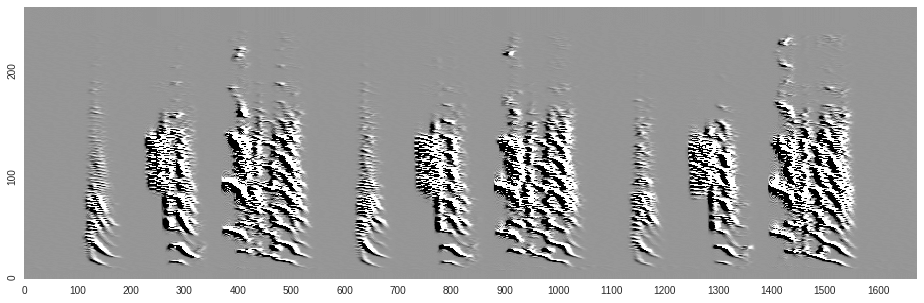

In [29]:
tspec = bsa.spectral_derivs(tutor, 256, 40, 1024)
fig = plt.figure(figsize=(16, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(tspec, contrast=0.01, ax=ax)
plt.show(fig)
plt.close(fig)

In [22]:
outputs = []
for i in range(run_param['concurrent']):
    outputs.append(wavfile.read(join(path, 'out_{}.wav'.format(i)))[1])

In [130]:
for out in outputs:
    sim = bsa.similarity(out, tutor)
    bsa.similarity_plot(sim, out, tutor)
    print(sim['similarity'])

KeyboardInterrupt: 

In [11]:
out = outputs[0]

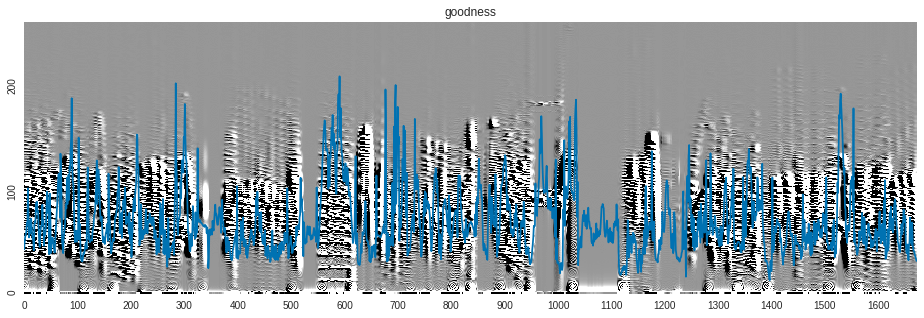

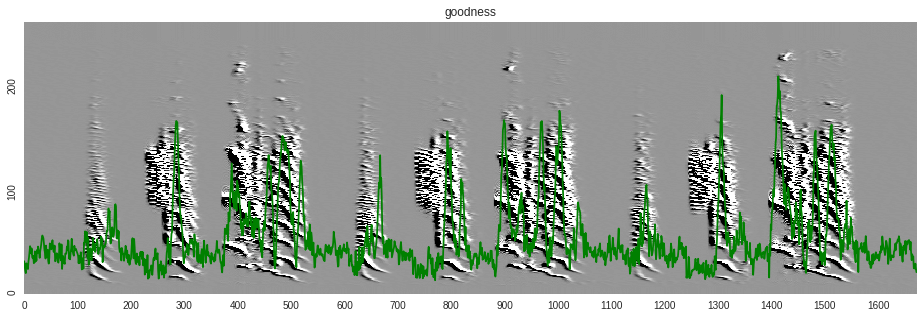

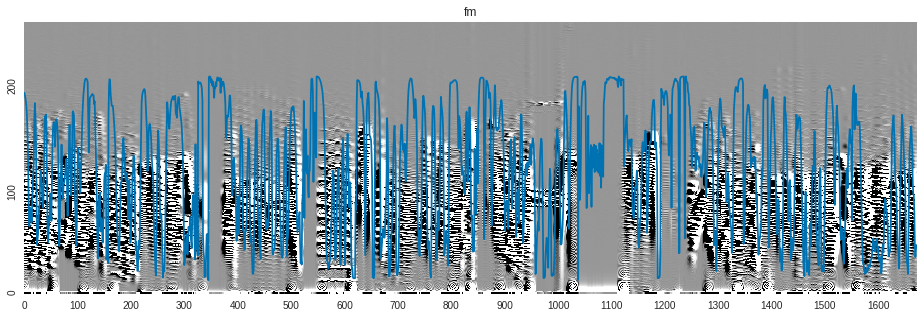

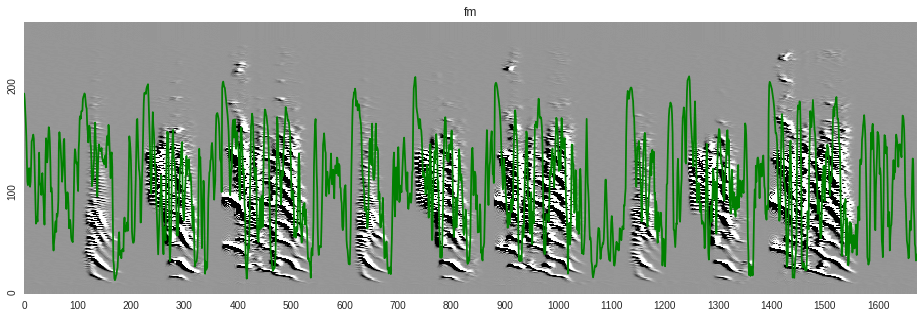

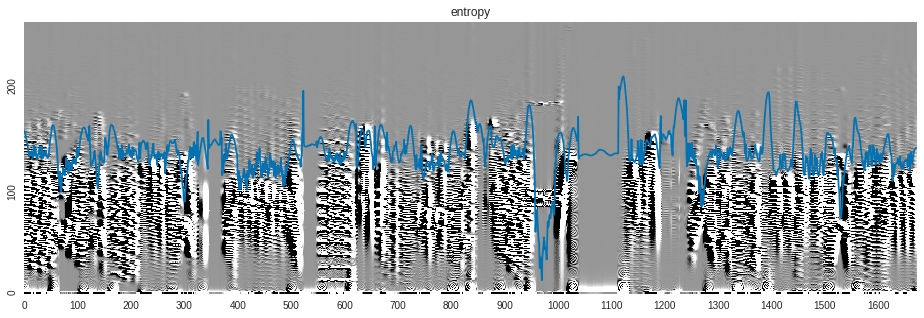

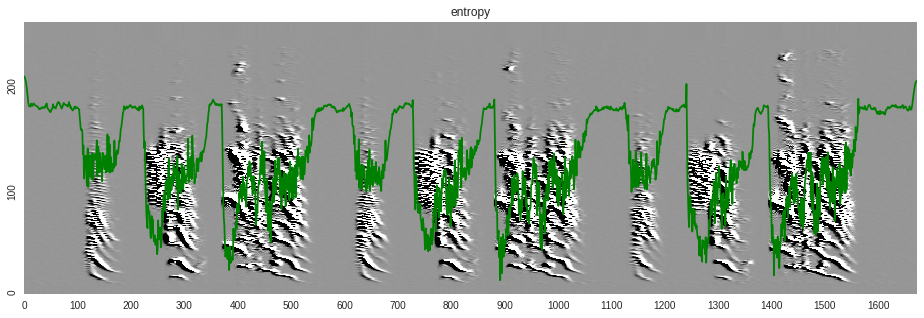

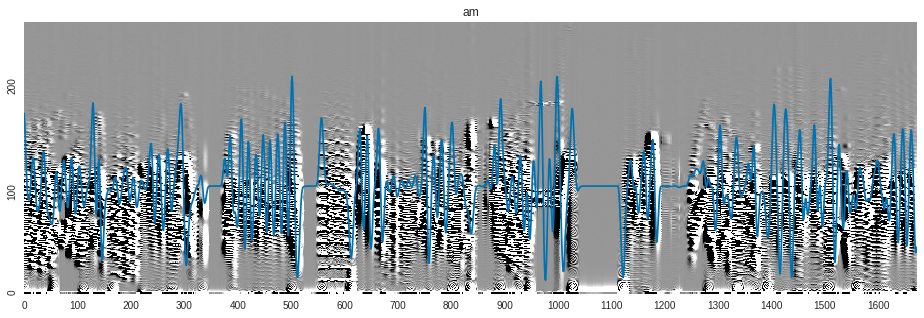

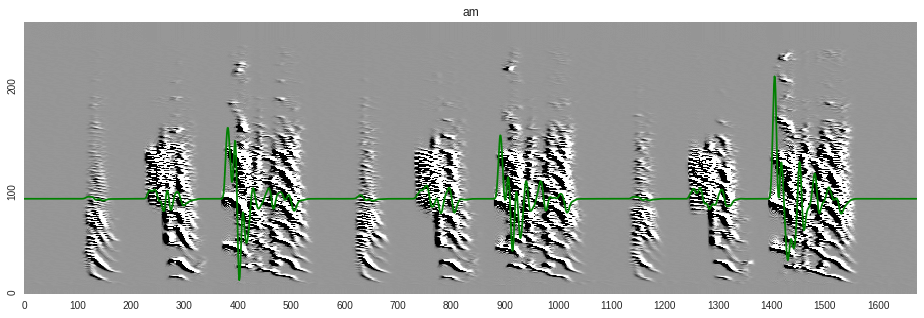

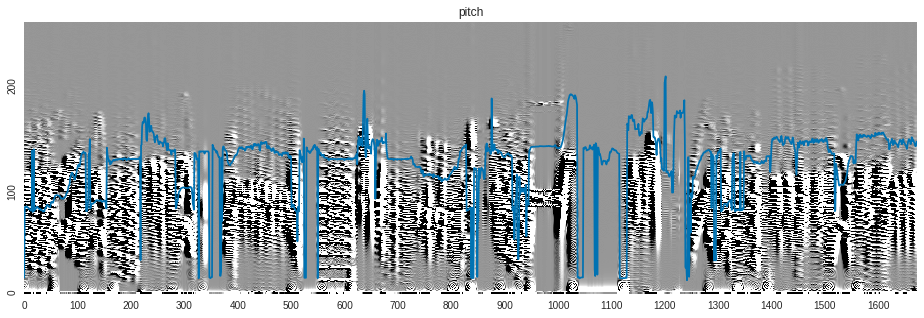

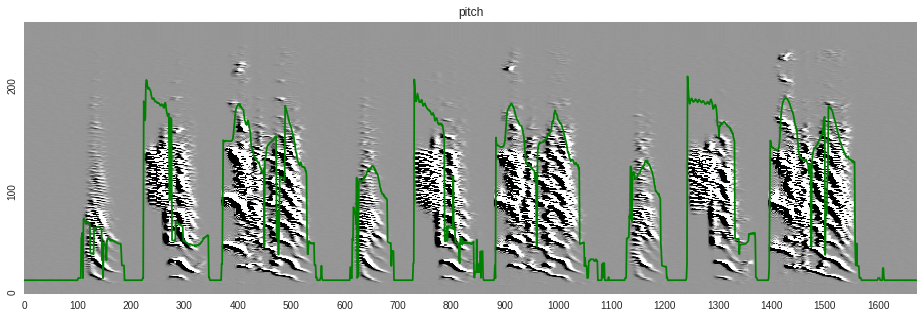

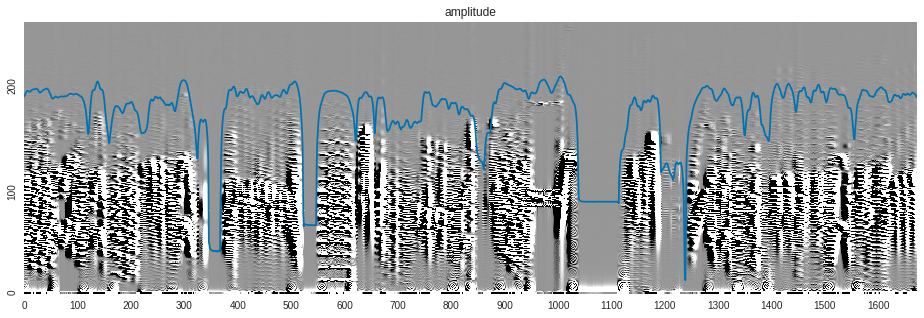

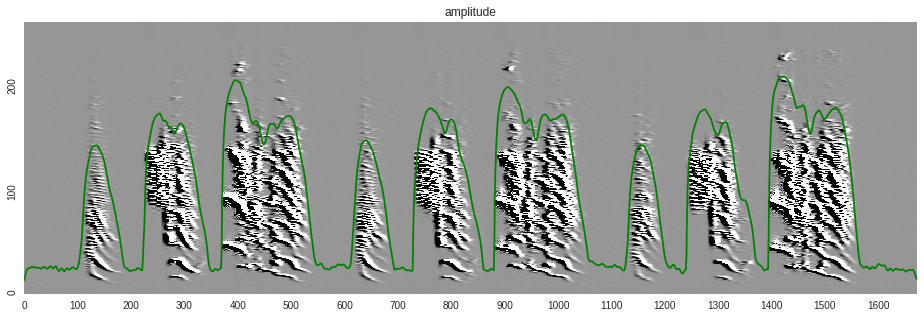

In [12]:
tfeat = bsa.all_song_features(tutor, 256, 40, 1024)
spec = bsa.spectral_derivs(out, 256, 40, 1024)
for name, value in bsa.all_song_features(out, 256, 40, 1024).items():
    fig = plt.figure(figsize=(16, 5))
    ax = fig.gca()
    ax = bsa.spectral_derivs_plot(spec, contrast=0.01, ax=ax)
    bsa.plot_over_spec(value, ax)
    #ax.plot(tfeat[name])
    ax.set_title(name)
    fig = plt.figure(figsize=(16, 5))
    ax = fig.gca()
    ax = bsa.spectral_derivs_plot(tspec, contrast=0.01, ax=ax)
    bsa.plot_over_spec(tfeat[name], ax, color='g')
    #ax.plot(tfeat[name])
    ax.set_title(name)
    

In [165]:
with open(join(path, 'songs.pkl'), 'rb') as f:
    smodels = pickle.load(f)

In [166]:
len(smodels[2].gestures)

36

In [167]:
import synth

In [168]:

ab = []
for i, gesture in enumerate(smodels[0].gestures):
    p = gesture[1]
    start = gesture[0]
    try:
        end = smodels[0].gestures[i+1][0]
    except IndexError:
        end = len(tutor)
    size = end - start
    ab.append(synth.gen_alphabeta(p, size, falpha=lambda x, p: synth.only_sin(x, p, nb_sin=3),
                fbeta=lambda x, p: synth.only_sin(x, p, nb_sin=1),
                falpha_nb_args=13))
ab = np.concatenate(ab)

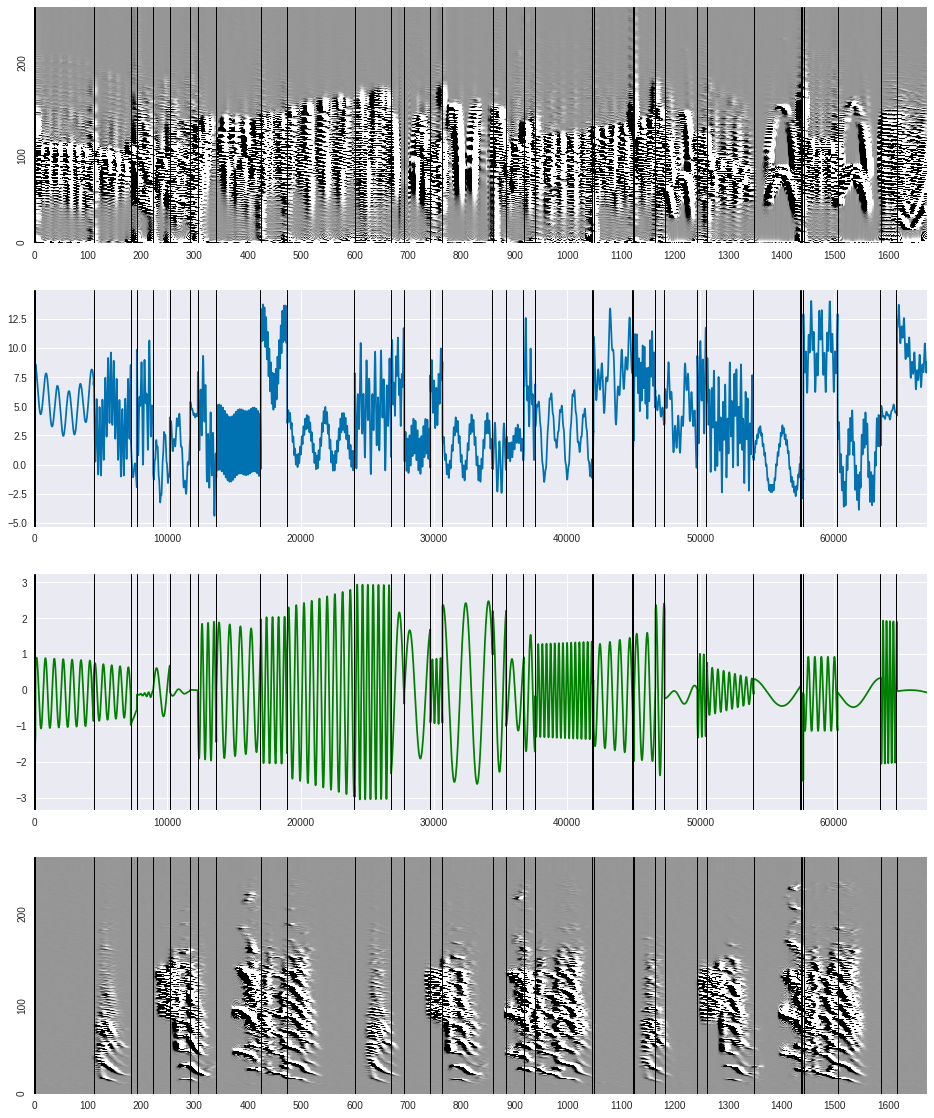

In [169]:
fig, axs = plt.subplots(4, 1, figsize=(16, 20))
ospec = bsa.spectral_derivs(outputs[0], 256, 40, 1024)
bsa.spectral_derivs_plot(ospec, contrast=0.01, ax=axs[0])
axs[0].set_xlim(0, ospec.shape[0])
axs[1].plot(ab[:, 0])
axs[1].set_xlim((0, ab.shape[0]))
axs[2].plot(ab[:, 1], color="g")
axs[2].set_xlim((0, ab.shape[0]))
bsa.spectral_derivs_plot(tspec, contrast=0.01, ax=axs[3])
for i, gesture in enumerate(smodels[0].gestures):
    start = gesture[0]
    axs[0].axvline(x=start/40, color="k", linewidth=1)
    axs[1].axvline(x=start, color="k", linewidth=1)
    axs[2].axvline(x=start, color="k", linewidth=1)
    axs[3].axvline(x=start/40, color="k", linewidth=1)

In [142]:
tutor_params = np.loadtxt('../data/ba_example_ab.dat')

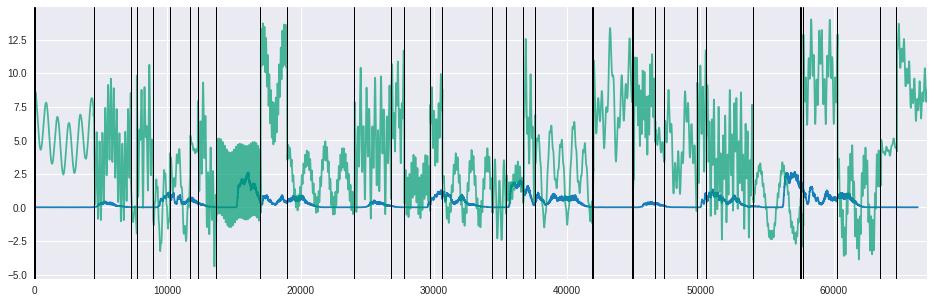

In [170]:
plt.figure(figsize=(16, 5))
plt.plot(tutor_params[:, 0], alpha=0.9)
plt.plot(ab[:, 0], alpha=0.7)
plt.xlim(0, ab.shape[0])
for i, gesture in enumerate(smodels[0].gestures):
    start = gesture[0]
    plt.axvline(x=start, color="k", linewidth=1)

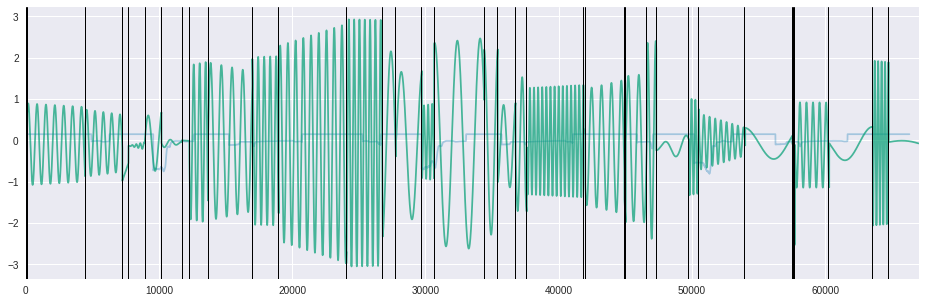

In [171]:
plt.figure(figsize=(16, 5))
plt.plot(tutor_params[:, 1], alpha=0.3)
plt.plot(ab[:, 1], alpha=0.7)
plt.xlim(0, ab.shape[0])
for i, gesture in enumerate(smodels[0].gestures):
    start = gesture[0]
    plt.axvline(x=start, color="k", linewidth=1)

In [172]:
gtes = np.loadtxt('../data/ba_example_gte.dat')
true_gtes = gtes[np.concatenate(((np.diff(gtes) > 100), (False,)))]

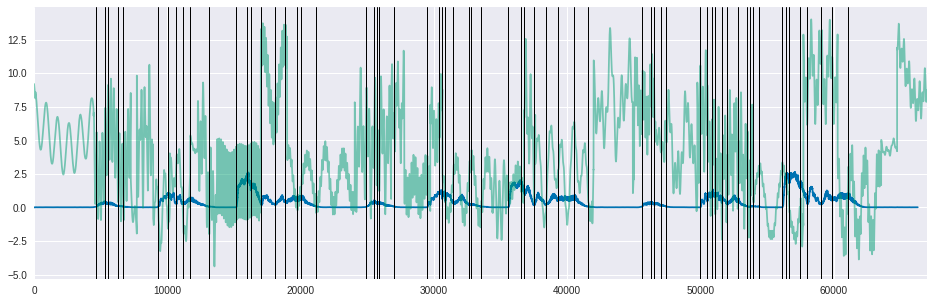

In [173]:
plt.figure(figsize=(16, 5))
plt.plot(tutor_params[:, 0])
plt.plot(ab[:, 0], alpha=0.5)
plt.xlim(0, ab.shape[0])
for gte in true_gtes:
    start = gesture[0]
    plt.axvline(x=gte, color="k", linewidth=1)

In [177]:
len(true_gtes)

65

In [178]:
np.mean(np.diff(true_gtes))

881.453125

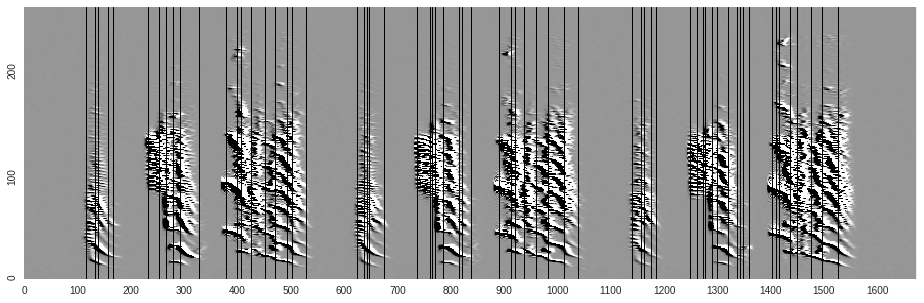

In [179]:
fig = plt.figure(figsize=(16, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(tspec, contrast=0.01, ax=ax)
ax.set_xlim(0, ab.shape[0]/40)
for gte in true_gtes:
    ax.axvline(x=gte/40, color="k", linewidth=1)

# Analysis of the song log

In [30]:
with open(join(path, 'songlog.pkl'), 'rb') as f:
    songlog = pickle.load(f)

In [31]:
scores = [item[2] for item in songlog]
labels = [item[0] for item in songlog]

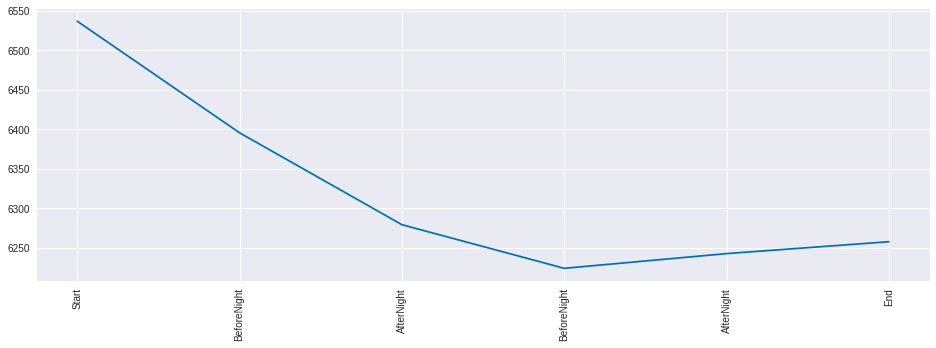

In [32]:
plt.figure(figsize=(16, 5))
plt.plot(np.min(scores, axis=1))
plt.xticks(np.arange(len(scores)), labels, rotation=90)
plt.show()

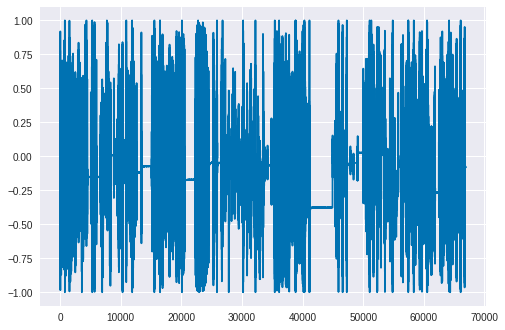

In [17]:
plt.plot(out)